In [1]:
from pyddm import Model
from pyddm.models import DriftLinear
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model
import numpy as np

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%run IDM_helper_functions.ipynb

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

from sbi.inference import MNLE
from pyro.distributions import InverseGamma
from torch.distributions import Beta, Binomial, Gamma
from sbi.utils import MultipleIndependent

from sbi.inference import MCMCPosterior, VIPosterior, RejectionPosterior
from sbi.utils.torchutils import atleast_2d

from sbi.utils import mcmc_transform
from sbi.inference.potentials.base_potential import BasePotential

## LCA parameter recovery

In [80]:
# Training data
num_simulations = 10000

prior = utils.BoxUniform(low=[0,0.6,0.01,0.2], high=[0.5,2, 1,1])

parameters = prior.sample((num_simulations,))
x = simul_LCA(np.array(parameters))

In [81]:
x

tensor([[1.0822, 0.0000],
        [1.1213, 0.0000],
        [0.6678, 1.0000],
        ...,
        [2.2325, 0.0000],
        [0.9411, 0.0000],
        [0.6859, 0.0000]])

In [82]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()


 Neural network successfully converged after 33 epochs.

In [83]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")

In [84]:
# inference with different x_o that has 10 trials
#torch.manual_seed(41)
num_trials = 100
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_LCA(np.array(parameters_o.repeat(num_trials, 1)))

In [85]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

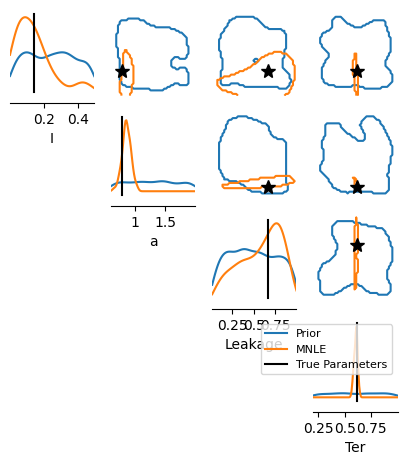

In [86]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.5

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    #contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['I', 'a','Leakage','Ter'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

## Train NN for IDM 

In [2]:
# Training data
num_simulations = 100000
prior = utils.BoxUniform(low=[0,0.2,8000,52000], high=[0.5,0.6,8800,53000])

parameters = prior.sample((num_simulations,))
x = simul_IDM_CG_inh_pos(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000
sim50000
sim51000
sim52000
sim53000
sim54000
sim55000
sim56000
sim57000
sim58000
sim59000
sim60000
sim61000
sim62000
sim63000
sim64000
sim65000
sim66000
sim67000
sim68000
sim69000
sim70000
sim71000
sim72000
sim73000
sim74000
sim75000
sim76000
sim77000
sim78000
sim79000
sim80000
sim81000
sim82000
sim83000
sim84000
sim85000
sim86000
sim87000
sim88000
sim89000
sim90000
sim91000
sim92000
sim93000
sim94000
sim95000
sim96000
sim97000
sim98000
sim99000


In [3]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")


/Users/wangjiashun/Documents/GitHub/sbi/sbi/neural_nets/mnle.py:64: UserWarning: The mixed neural likelihood estimator assumes that x contains
        continuous data in the first n-1 columns (e.g., reaction times) and
        categorical data in the last column (e.g., corresponding choices). If
        this is not the case for the passed `x` do not use this function.
  this is not the case for the passed `x` do not use this function."""


 Neural network successfully converged after 38 epochs.

## IDM parameter recovery

In [11]:
# inference with different x_o that has 10 trials
num_trials = 300
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_CG_inh_pos(np.array(parameters_o.repeat(num_trials, 1)))

sim0


In [12]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

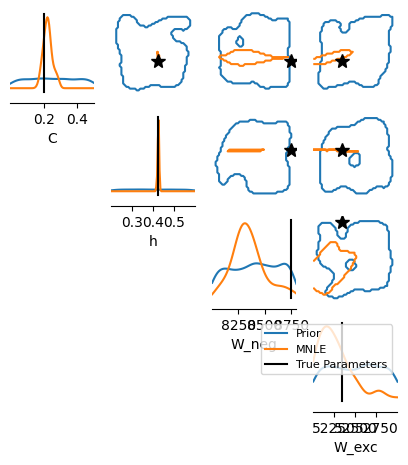

In [13]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','W_neg', 'W_exc'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

/Users/wangjiashun/Documents/GitHub/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


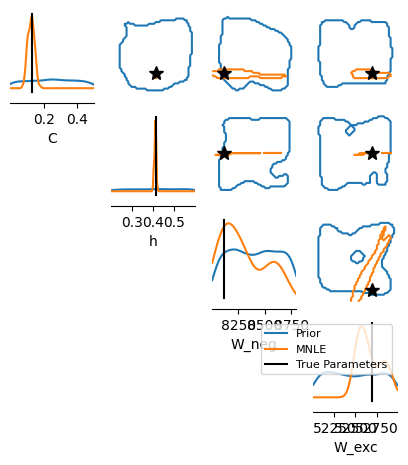

In [6]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','W_neg', 'W_exc'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

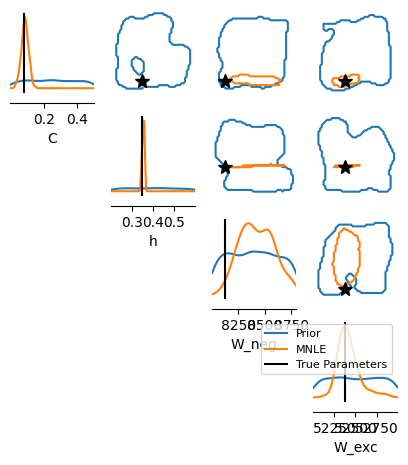

In [15]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','W_neg', 'W_exc'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

## Simulate from LCA and fit with IDM

In [150]:
Is = np.random.uniform(low=0.1, high=4, size=30)
As = np.random.uniform(low=0.4, high=0.8, size=30)
Inhs = np.random.uniform(low=0.1, high=4, size=30)
#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 500
num_samples = 100
par_fitted = np.zeros((30,3))

In [151]:
for i in range(len(Is)):
    print(i)
    LCA_o = simul_LCA(np.tile((Is[i], As[i], Inhs[i]), (n_trials,1))) # simulate IDM data
    print(LCA_o[0:5,:])
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.6,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
tensor([[1.4020, 0.0000],
        [0.8870, 0.0000],
        [0.5680, 1.0000],
        [0.6120, 1.0000],
        [0.7680, 0.0000]])
[2.0425561e-01 4.0492842e-01 6.8782568e+03]
1
tensor([[0.5740, 0.0000],
        [0.6490, 0.0000],
        [0.5950, 0.0000],
        [0.6080, 0.0000],
        [0.6730, 0.0000]])
[3.1178629e-01 4.0015432e-01 6.7044673e+03]
2
tensor([[0.6520, 0.0000],
        [0.6730, 0.0000],
        [0.5450, 0.0000],
        [0.6270, 0.0000],
        [0.5610, 0.0000]])
[3.2582918e-01 3.7295932e-01 6.6481040e+03]
3
tensor([[0.7700, 1.0000],
        [0.5440, 1.0000],
        [0.8770, 0.0000],
        [0.6530, 1.0000],
        [0.8140, 0.0000]])
[3.1458724e-01 3.6899114e-01 6.6702173e+03]
4
tensor([[0.7770, 0.0000],
        [0.6260, 0.0000],
        [0.5700, 0.0000],
        [0.5200, 0.0000],
        [0.5620, 0.0000]])
[3.3504364e-01 4.6827739e-01 6.6119951e+03]
5
tensor([[0.5310, 0.0000],
        [0.5920, 0.0000],
        [0.7040, 0.0000],
        [0.6560, 0.0000],
        [

Text(0, 0.5, 'W_neg')

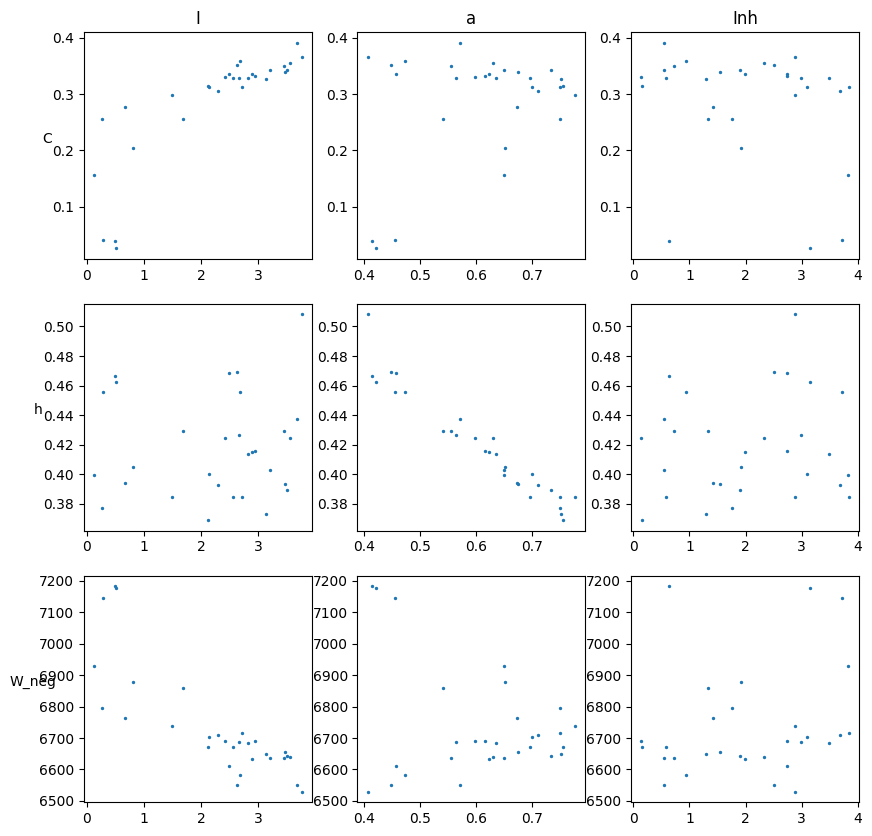

In [152]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)

Text(0, 0.5, 'W_neg')

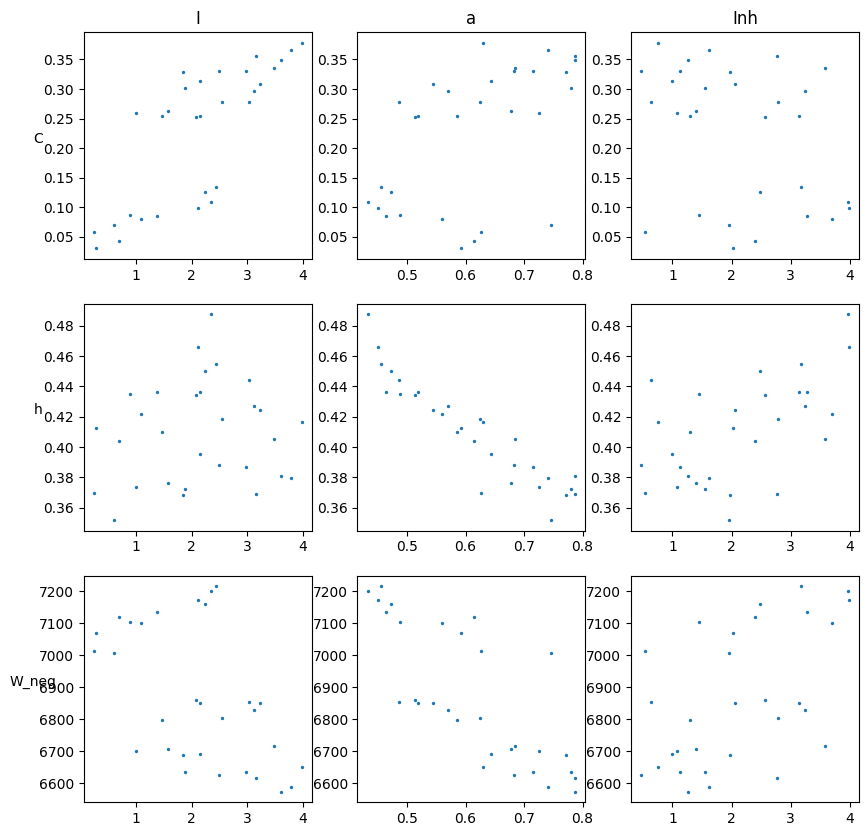

In [147]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)